In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# load dataset
df = pd.read_csv('train.csv')
# keep certain columns
df = df[['m_dep','px_height','px_width','sc_h','sc_w','price_range']]
# rename columns
df = df.rename(columns={
  'm_dep':'depth',
  'px_height':'pixel_height',
  'px_width':'pixel_width',
  'sc_h':'screen_height',
  'sc_w':'screen_width'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   depth          2000 non-null   float64
 1   pixel_height   2000 non-null   int64  
 2   pixel_width    2000 non-null   int64  
 3   screen_height  2000 non-null   int64  
 4   screen_width   2000 non-null   int64  
 5   price_range    2000 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 93.9 KB


In [3]:
df

,depth,pixel_height,pixel_width,screen_height,screen_width,price_range
0,0.6,20,756,9,7,1
1,0.7,905,1988,17,3,2
2,0.9,1263,1716,11,2,2
3,0.8,1216,1786,16,8,2
4,0.6,1208,1212,8,2,1
...,...,...,...,...,...,...
1995,0.8,1222,1890,13,4,0
1996,0.2,915,1965,11,10,2
1997,0.7,868,1632,9,1,3
1998,0.1,336,670,18,10,0


In [42]:
df['screen_size'] = df.screen_height * df.screen_width
df.screen_size = round(np.sqrt(df.screen_height**2 + df.screen_width**2) * 0.393701, 1) # en inch
df['resolution'] = df.pixel_height * df.pixel_width # en cm
df

,depth,pixel_height,pixel_width,screen_height,screen_width,price_range,screen_size,resolution
0,0.6,20,756,9,7,1,4.5,15120
1,0.7,905,1988,17,3,2,6.8,1799140
2,0.9,1263,1716,11,2,2,4.4,2167308
3,0.8,1216,1786,16,8,2,7.0,2171776
4,0.6,1208,1212,8,2,1,3.2,1464096
...,...,...,...,...,...,...,...,...
1995,0.8,1222,1890,13,4,0,5.4,2309580
1996,0.2,915,1965,11,10,2,5.9,1797975
1997,0.7,868,1632,9,1,3,3.6,1416576
1998,0.1,336,670,18,10,0,8.1,225120


In [5]:
df.describe()

,depth,pixel_height,pixel_width,screen_height,screen_width,price_range,screen_size,resolution
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03
mean,0.501750,645.108000,1251.515500,12.306500,5.767000,1.500000,5.500850,9.052601e+05
std,0.288416,443.780811,432.199447,4.213245,4.356398,1.118314,2.014285,8.297625e+05
min,0.100000,0.000000,500.000000,5.000000,0.000000,0.000000,2.000000,0.000000e+00
25%,0.200000,282.750000,874.750000,9.000000,2.000000,0.750000,3.700000,2.632005e+05
50%,0.500000,564.000000,1247.000000,12.000000,5.000000,1.500000,5.600000,6.013590e+05
75%,0.800000,947.250000,1633.000000,16.000000,9.000000,2.250000,7.000000,1.359027e+06
max,1.000000,1960.000000,1998.000000,19.000000,18.000000,3.000000,10.300000,3.886306e+06


Text(0, 0.5, 'Number of Mobiles')

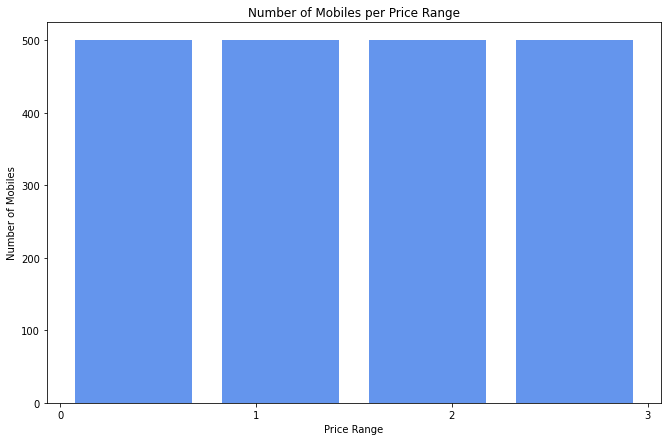

In [6]:
# 500 téléphones par prix
plt.figure(figsize=(11,7), facecolor='w')
hist = df.price_range.plot.hist(bins=4, rwidth=0.8, range=(0,3), color='cornflowerblue', title = "Number of Mobiles per Price Range")
plt.xlabel('Price Range')
plt.xticks(range(0,4))
plt.ylabel('Number of Mobiles')

Text(0.5, 0, 'Depth en cm')

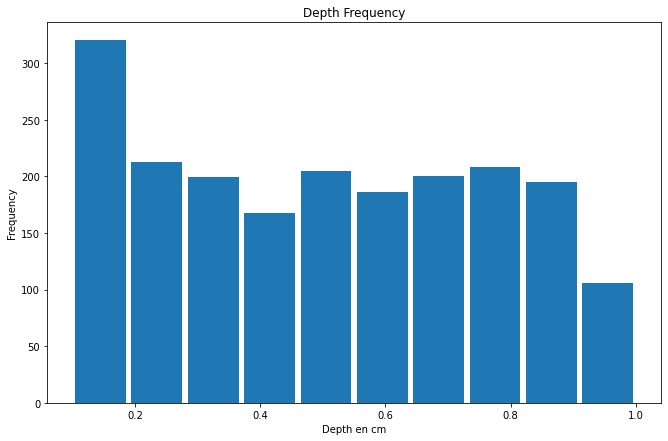

In [7]:
plt.figure(figsize=(11,7), facecolor='w')
hist = df.depth.plot.hist(bins=10, rwidth=0.9, range=(0.1,1), color='tab:blue', title = "Depth Frequency")
plt.xlabel('Depth en cm')

Text(0.5, 0, 'Pixel Height')

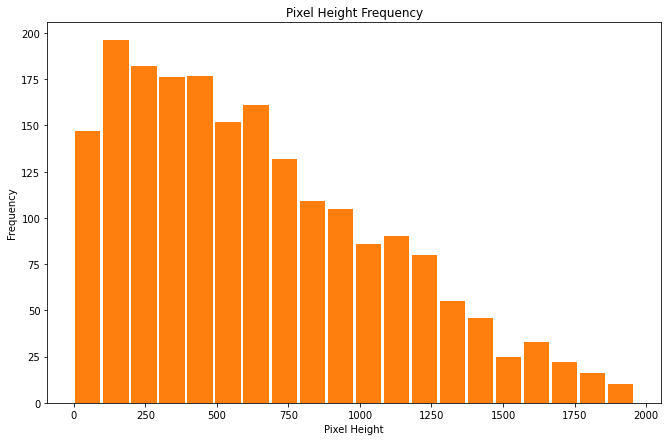

In [8]:
plt.figure(figsize=(11,7), facecolor='w')
hist = df.pixel_height.plot.hist(bins=20, rwidth=0.9, range=(0,1960), color='tab:orange', title = "Pixel Height Frequency")
plt.xlabel('Pixel Height')

Text(0.5, 0, 'Pixel Width')

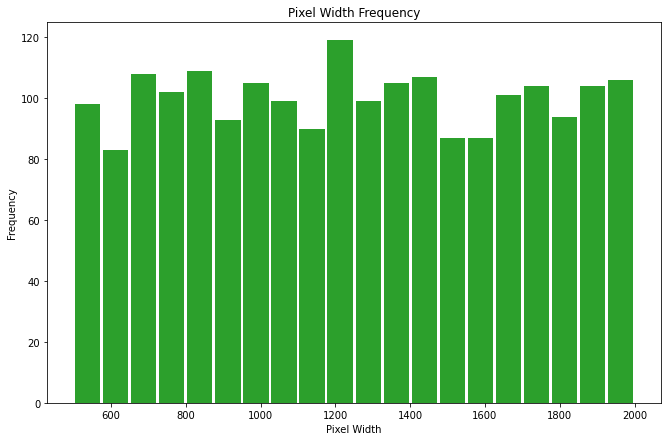

In [9]:
plt.figure(figsize=(11,7), facecolor='w')
hist = df.pixel_width.plot.hist(bins=20, rwidth=0.9, range=(500,2000), color='tab:green', title = "Pixel Width Frequency")
plt.xlabel('Pixel Width')

Text(0.5, 0, 'Screen Height en cm')

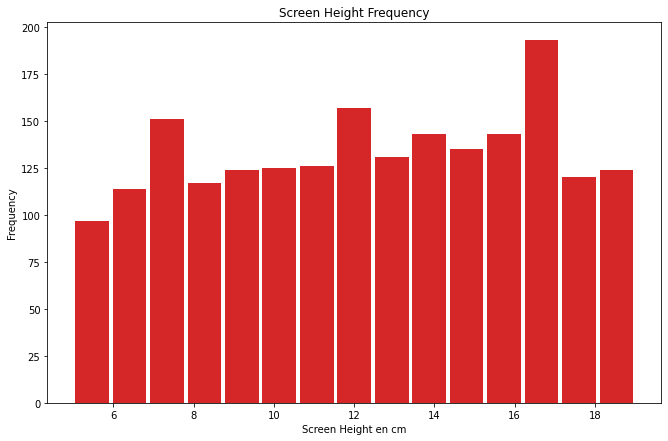

In [10]:
plt.figure(figsize=(11,7), facecolor='w')
hist = df.screen_height.plot.hist(bins=15, rwidth=0.9, range=(5,19), color='tab:red', title = "Screen Height Frequency")
plt.xlabel('Screen Height en cm')

Text(0.5, 0, 'Screen Width en cm')

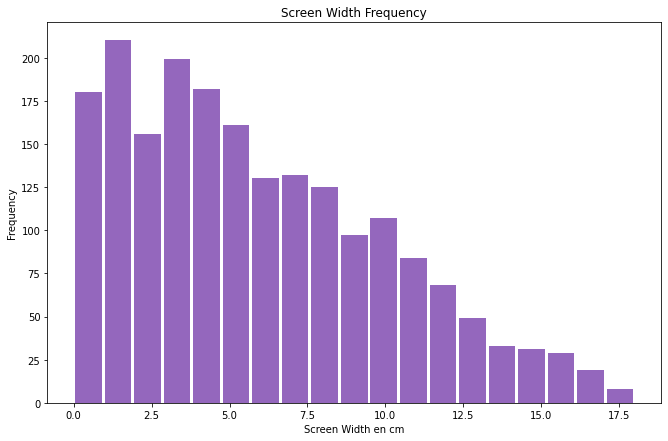

In [11]:
plt.figure(figsize=(11,7), facecolor='w')
hist = df.screen_width.plot.hist(bins=19, rwidth=0.9, range=(0,18), color='tab:purple', title = "Screen Width Frequency")
plt.xlabel('Screen Width en cm')

Text(0.5, 0, 'Screen Size en inch')

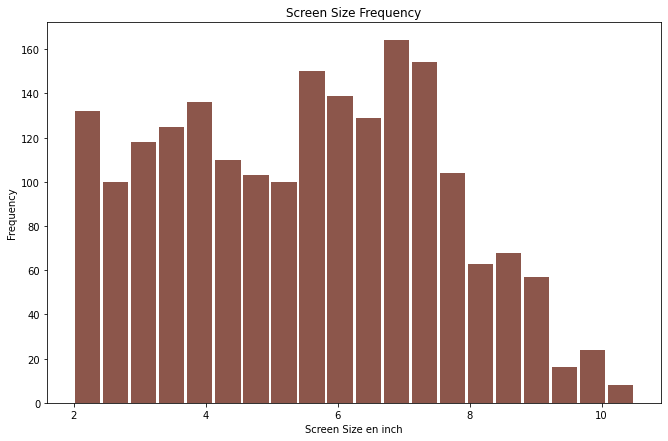

In [12]:
plt.figure(figsize=(11,7), facecolor='w')
hist = df.screen_size.plot.hist(bins=20, rwidth=0.9, range=(2,10.5), color='tab:brown', title = "Screen Size Frequency")
plt.xlabel('Screen Size en inch')

Text(0.5, 0, 'Resolution')

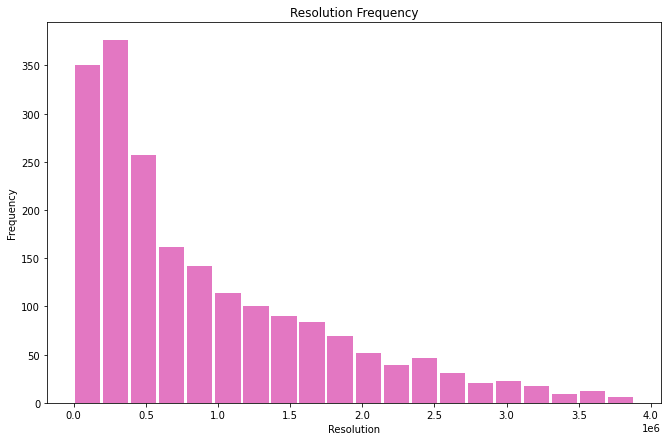

In [13]:
plt.figure(figsize=(11,7), facecolor='w')
hist = df.resolution.plot.hist(bins=20, rwidth=0.9, color='tab:pink', title = "Resolution Frequency")
plt.xlabel('Resolution')

In [14]:
# pd.set_option('display.max_columns', None)
# pd.reset_option('^display.', silent=True)
df_mean = df.groupby('price_range').mean()
df_mean
# df.groupby('price_range').describe()

,depth,pixel_height,pixel_width,screen_height,screen_width,screen_size,resolution
price_range,,,,,,,
0,0.4902,536.408,1150.270,12.324,5.682,5.4862,678837.798
1,0.5240,666.892,1251.908,12.212,5.544,5.4214,930234.068
2,0.4908,632.284,1234.046,12.010,5.714,5.3844,880749.466
3,0.5020,744.848,1369.838,12.680,6.128,5.7114,1131218.882


In [15]:
df_median = df.groupby('price_range').median()
df_median

,depth,pixel_height,pixel_width,screen_height,screen_width,screen_size,resolution
price_range,,,,,,,
0,0.5,465.5,1132.5,12.0,5.0,5.60,448852.0
1,0.5,606.0,1223.0,12.0,5.0,5.50,661429.0
2,0.5,538.5,1221.5,12.0,5.0,5.35,560907.0
3,0.5,674.0,1415.5,13.0,5.0,5.95,860881.0


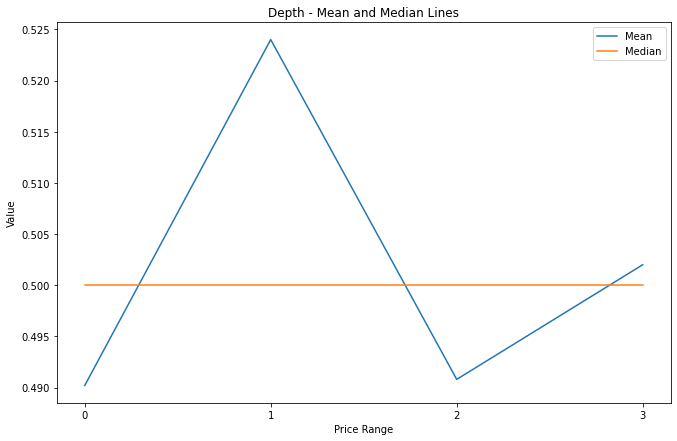

In [16]:
plt.figure(figsize=(11,7), facecolor='w')
plt.title('Depth - Mean and Median Lines')
plt.xlabel('Price Range')
plt.xticks(range(0,4))
plt.ylabel('Value')
plt.plot(df_mean.depth, label='Mean')
plt.plot(df_median.depth, label='Median')
plt.legend()

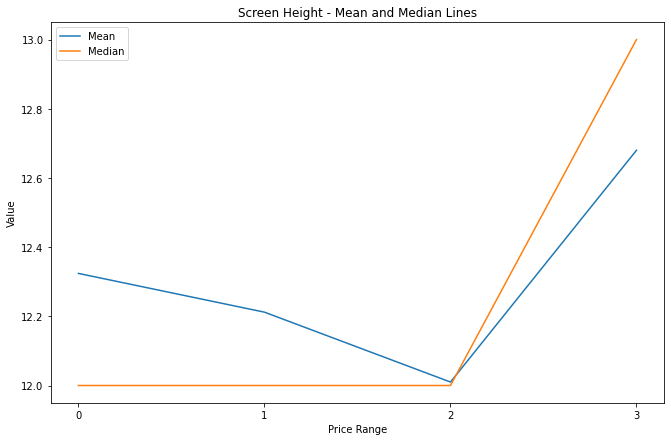

In [17]:
plt.figure(figsize=(11,7), facecolor='w')
plt.title('Screen Height - Mean and Median Lines')
plt.xlabel('Price Range')
plt.xticks(range(0,4))
plt.ylabel('Value')
plt.plot(df_mean.screen_height, label='Mean')
plt.plot(df_median.screen_height, label='Median')
plt.legend()

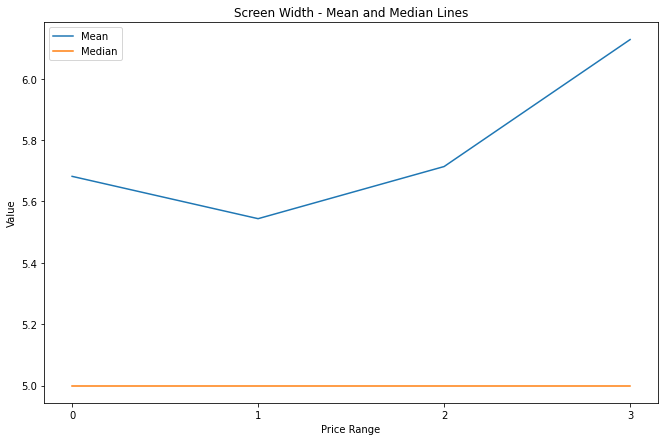

In [18]:
plt.figure(figsize=(11,7), facecolor='w')
plt.title('Screen Width - Mean and Median Lines')
plt.xlabel('Price Range')
plt.xticks(range(0,4))
plt.ylabel('Value')
plt.plot(df_mean.screen_width, label='Mean')
plt.plot(df_median.screen_width, label='Median')
plt.legend()

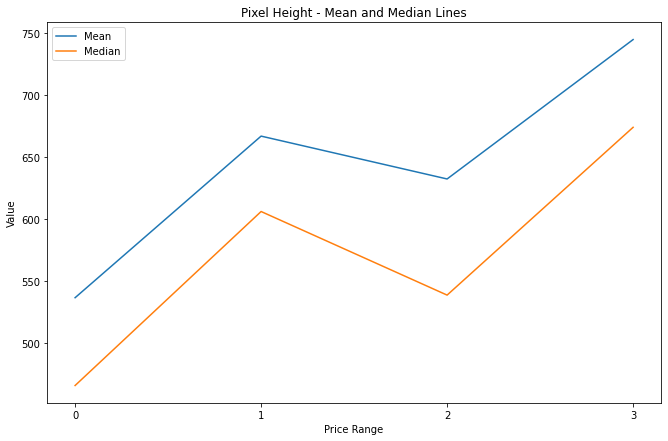

In [19]:
plt.figure(figsize=(11,7), facecolor='w')
plt.title('Pixel Height - Mean and Median Lines')
plt.xlabel('Price Range')
plt.xticks(range(0,4))
plt.ylabel('Value')
plt.plot(df_mean.pixel_height, label='Mean')
plt.plot(df_median.pixel_height, label='Median')
plt.legend()

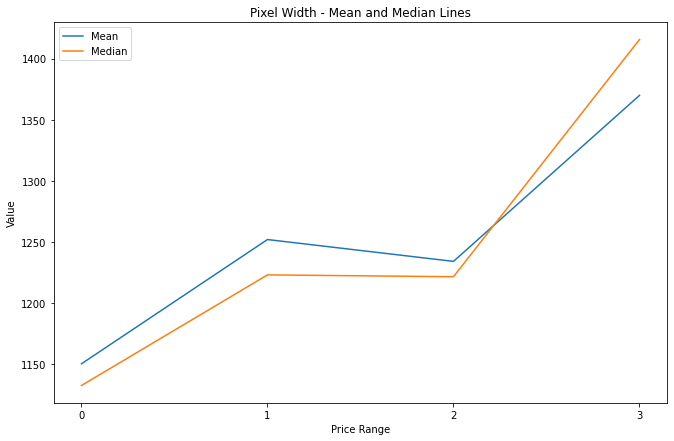

In [20]:
plt.figure(figsize=(11,7), facecolor='w')
plt.title('Pixel Width - Mean and Median Lines')
plt.xlabel('Price Range')
plt.xticks(range(0,4))
plt.ylabel('Value')
plt.plot(df_mean.pixel_width, label='Mean')
plt.plot(df_median.pixel_width, label='Median')
plt.legend()

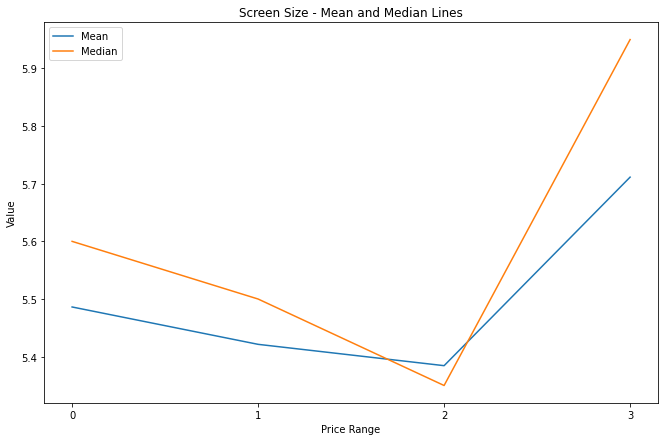

In [21]:
plt.figure(figsize=(11,7), facecolor='w')
plt.title('Screen Size - Mean and Median Lines')
plt.xlabel('Price Range')
plt.xticks(range(0,4))
plt.ylabel('Value')
plt.plot(df_mean.screen_size, label='Mean')
plt.plot(df_median.screen_size, label='Median')
plt.legend()

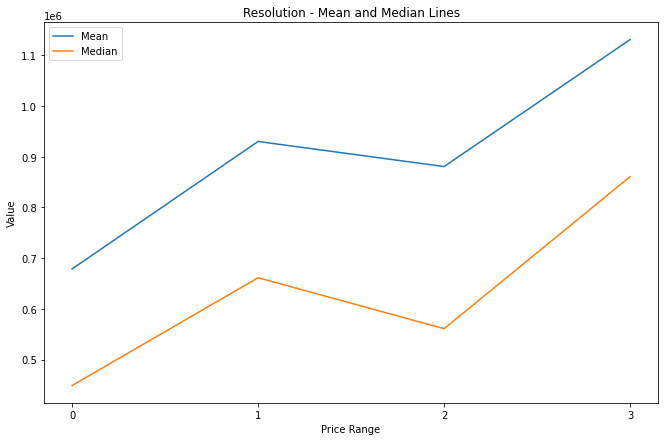

In [22]:
plt.figure(figsize=(11,7), facecolor='w')
plt.title('Resolution - Mean and Median Lines')
plt.xlabel('Price Range')
plt.xticks(range(0,4))
plt.ylabel('Value')
plt.plot(df_mean.resolution, label='Mean')
plt.plot(df_median.resolution, label='Median')
plt.legend()

In [23]:
df_median

,depth,pixel_height,pixel_width,screen_height,screen_width,screen_size,resolution
price_range,,,,,,,
0,0.5,465.5,1132.5,12.0,5.0,5.60,448852.0
1,0.5,606.0,1223.0,12.0,5.0,5.50,661429.0
2,0.5,538.5,1221.5,12.0,5.0,5.35,560907.0
3,0.5,674.0,1415.5,13.0,5.0,5.95,860881.0


In [24]:
normalized_df_median = (df_median-df_median.mean())/df_mean.std()
normalized_df_median

,depth,pixel_height,pixel_width,screen_height,screen_width,screen_size,resolution
price_range,,,,,,,
0,0.0,-1.220850,-1.278003,-0.890116,0.0,0.000000,-0.991278
1,0.0,0.405021,-0.277707,-0.890116,0.0,-0.682424,0.152928
2,0.0,-0.376091,-0.294286,-0.890116,0.0,-1.706060,-0.388137
3,0.0,1.191920,1.849995,2.670347,0.0,2.388484,1.226487


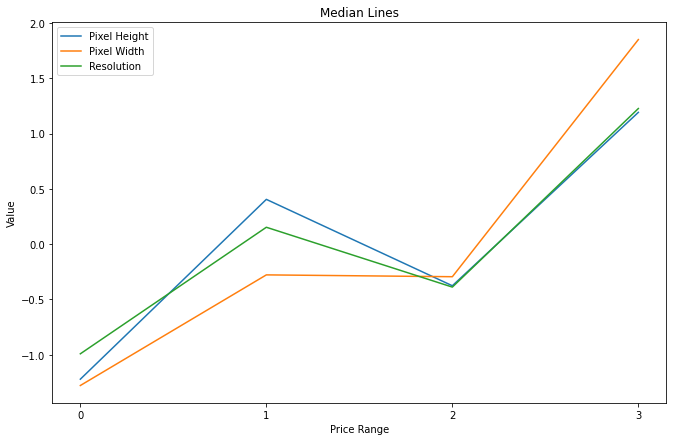

In [25]:
plt.figure(figsize=(11,7), facecolor='w')
plt.title('Median Lines')
plt.xlabel('Price Range')
plt.xticks(range(0,4))
plt.ylabel('Value')
plt.plot(normalized_df_median.pixel_height, label='Pixel Height')
plt.plot(normalized_df_median.pixel_width, label='Pixel Width')
plt.plot(normalized_df_median.resolution, label='Resolution')
plt.legend()

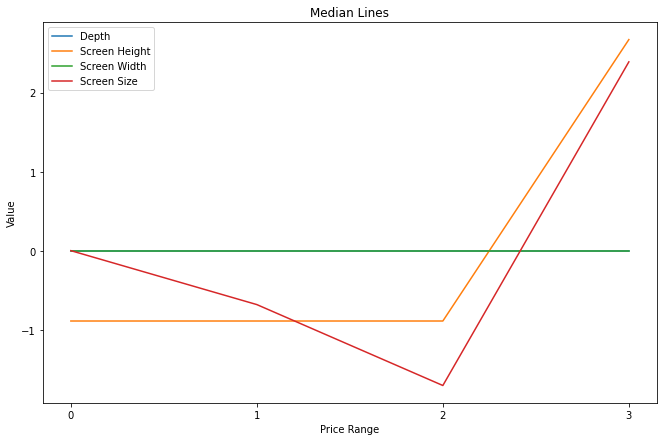

In [26]:
plt.figure(figsize=(11,7), facecolor='w')
plt.title('Median Lines')
plt.xlabel('Price Range')
plt.xticks(range(0,4))
plt.ylabel('Value')
plt.plot(normalized_df_median.depth, label='Depth')
plt.plot(normalized_df_median.screen_height, label='Screen Height')
plt.plot(normalized_df_median.screen_width, label='Screen Width')
plt.plot(normalized_df_median.screen_size, label='Screen Size')
plt.legend()

Text(0.5, 1.0, 'Screen Size Frequency (2017)')

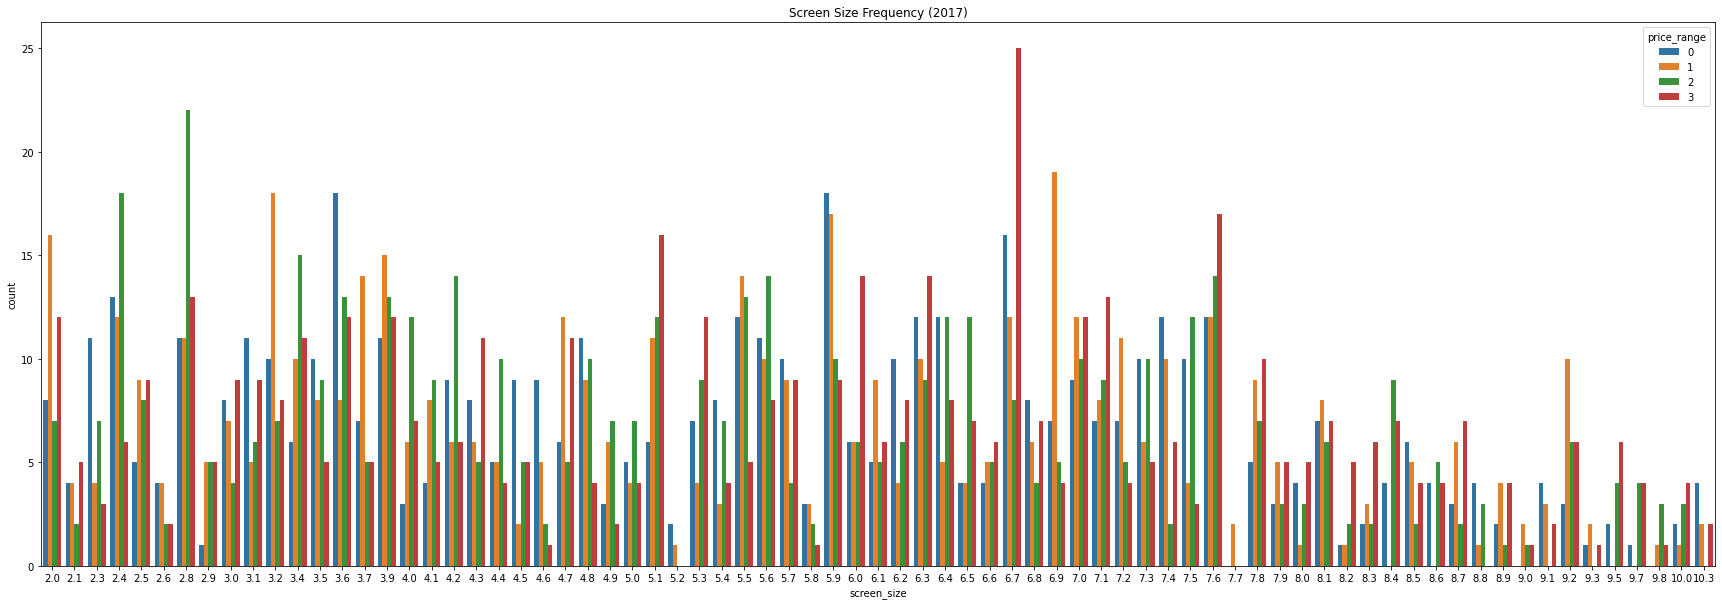

In [126]:
plt.figure(facecolor='w', figsize = (30,10))
sns.countplot(x='screen_size', data=df, hue='price_range')
plt.title('Screen Size Frequency (2017)')

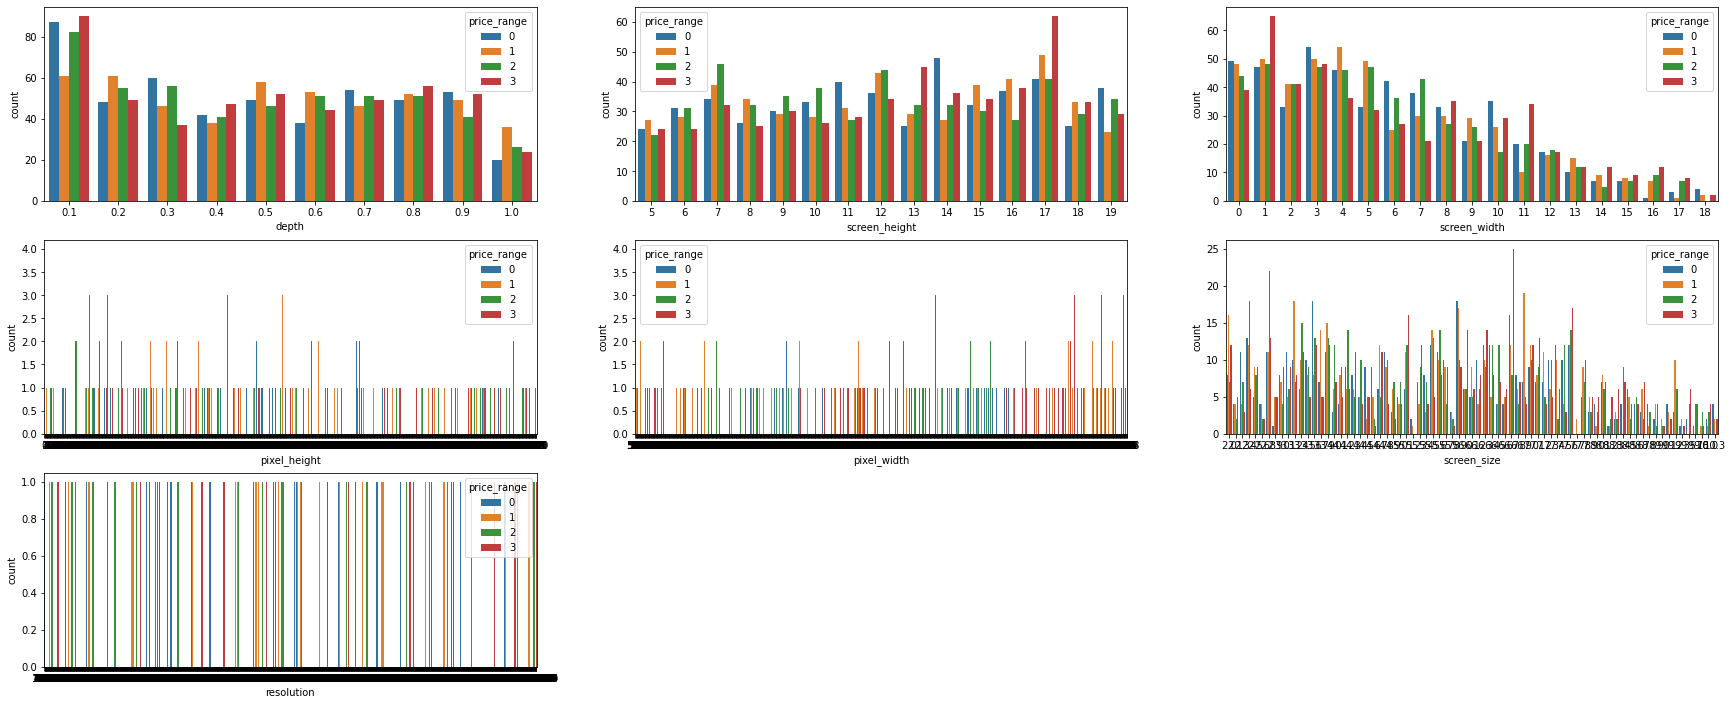

In [120]:
i = 1
plt.figure(facecolor='w', figsize = (30,25))
for feature in ['depth','screen_height','screen_width', 'pixel_height','pixel_width', 'screen_size']:
    plt.subplot(6,3,i)
    sns.countplot(x=feature, data=df, hue='price_range')
    i +=1

Text(0.5, 0, 'Pixels')

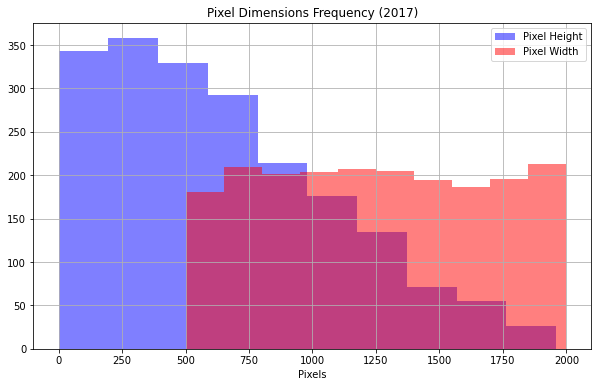

In [130]:
plt.figure(facecolor='w', figsize=(10,6))
df.pixel_height.hist(alpha=0.5,color='blue',label='Pixel Height')
df.pixel_width.hist(alpha=0.5,color='red',label='Pixel Width')
plt.title('Pixel Dimensions Frequency (2017)')
plt.legend()
plt.xlabel('Pixels')

Text(0.5, 1.0, 'Number of mobile phones per price range (2017)')

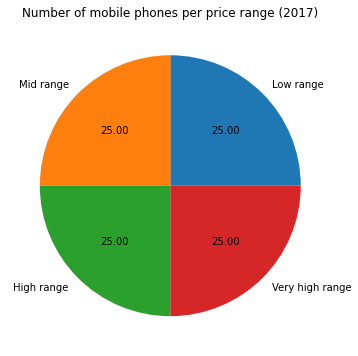

In [161]:
price_labels = ["Low range", "Mid range", "High range", "Very high range"]
plt.figure(facecolor='w', figsize=(10,6))
plt.pie(df.groupby(['price_range']).size(), labels = price_labels, autopct='%.2f')
plt.title('Number of mobile phones per price range (2017)')

In [75]:
def count_rows(rows):
    return len(rows)

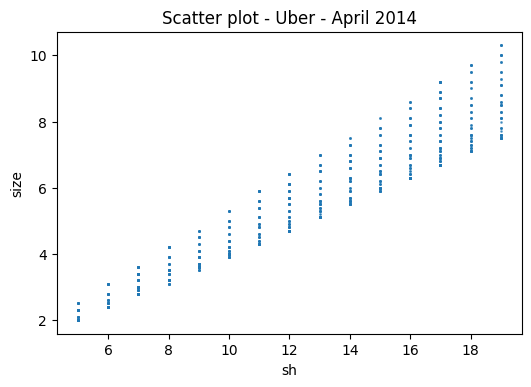

In [45]:
plt.figure(facecolor='w',dpi=100)
plt.title('Scatter plot - Uber - April 2014')
plt.xlabel('sh')
plt.ylabel('size')
plt.scatter(df.screen_height,df.screen_size,s=0.8,alpha=0.4)
# plt.xlim()
# plt.ylim(-0.5,3.5)

In [25]:
inr = pd.read_csv('inr.csv')
inr = inr[['Screen size (inches)', 'Resolution x', 'Resolution y', 'Price']]
inr

,Screen size (inches),Resolution x,Resolution y,Price
0,6.67,1440,3120,58998
1,6.50,1080,2400,27999
2,6.50,1242,2688,106900
3,6.10,828,1792,62900
4,6.40,1080,2340,49990
...,...,...,...,...
1354,4.00,480,800,2599
1355,5.00,480,854,2940
1356,4.50,480,854,2999
1357,4.00,480,800,2498


In [48]:
tmp = inr['Price'].to_frame()
tmp = tmp.apply(lambda x : pd.cut(x,[-1,20000,33000,60000,174991],labels=[0,1,2,3]))
inr['price_range'] = tmp
inr = inr.rename(columns={
  'Screen size (inches)':'screen_size',
  'Resolution y':'pixel_height',
  'Resolution x':'pixel_width',
})
inr

,screen_size,pixel_width,pixel_height,Price,price_range
0,6.67,1440,3120,58998,2
1,6.50,1080,2400,27999,1
2,6.50,1242,2688,106900,3
3,6.10,828,1792,62900,3
4,6.40,1080,2340,49990,2
...,...,...,...,...,...
1354,4.00,480,800,2599,0
1355,5.00,480,854,2940,0
1356,4.50,480,854,2999,0
1357,4.00,480,800,2498,0


Text(0.5, 1.0, 'Number of mobile phones per price range (2022 in India)')

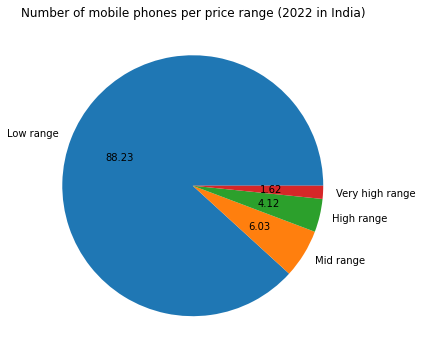

In [160]:
price_labels = ["Low range", "Mid range", "High range", "Very high range"]
plt.figure(facecolor='w', figsize=(10,6))
plt.pie(inr.groupby(['price_range']).size(), labels = price_labels, autopct='%.2f')
plt.title('Number of mobile phones per price range (2022 in India)')

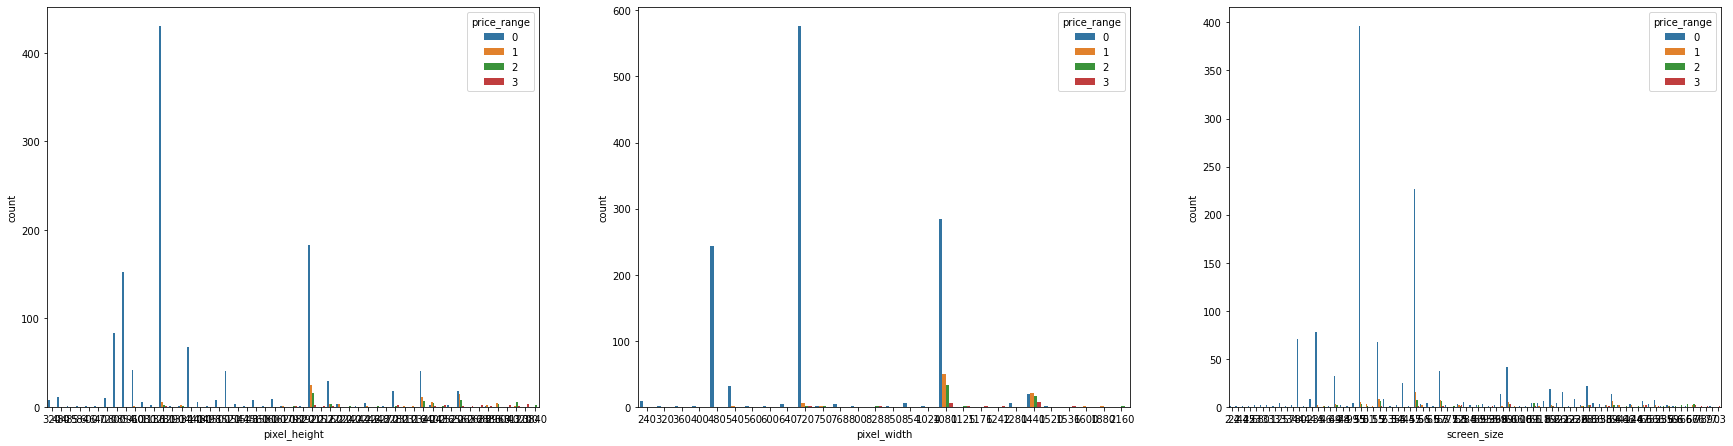

In [56]:
i = 1
plt.figure(facecolor='w', figsize = (30,25))
for feature in ['pixel_height','pixel_width', 'screen_size']:
    plt.subplot(3,3,i)
    sns.countplot(x=feature, data=inr, hue='price_range')
    # sns.barplot(data=inr, x=feature, y="count", hue='price_range')
    i +=1

<AxesSubplot:xlabel='pixel_height', ylabel='count'>

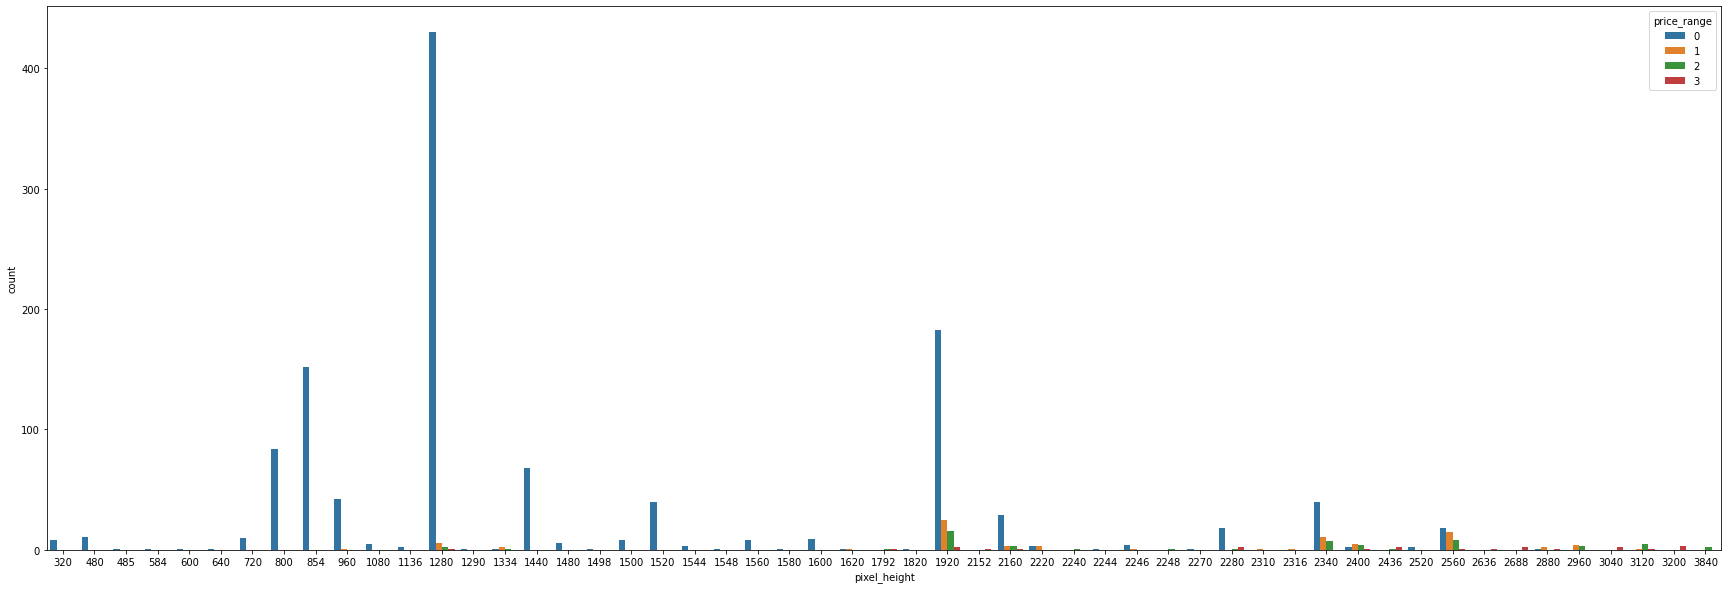

In [89]:
plt.figure(facecolor='w', figsize = (30,10))
sns.countplot(x='pixel_height', data=inr, hue='price_range')

<AxesSubplot:xlabel='pixel_width', ylabel='count'>

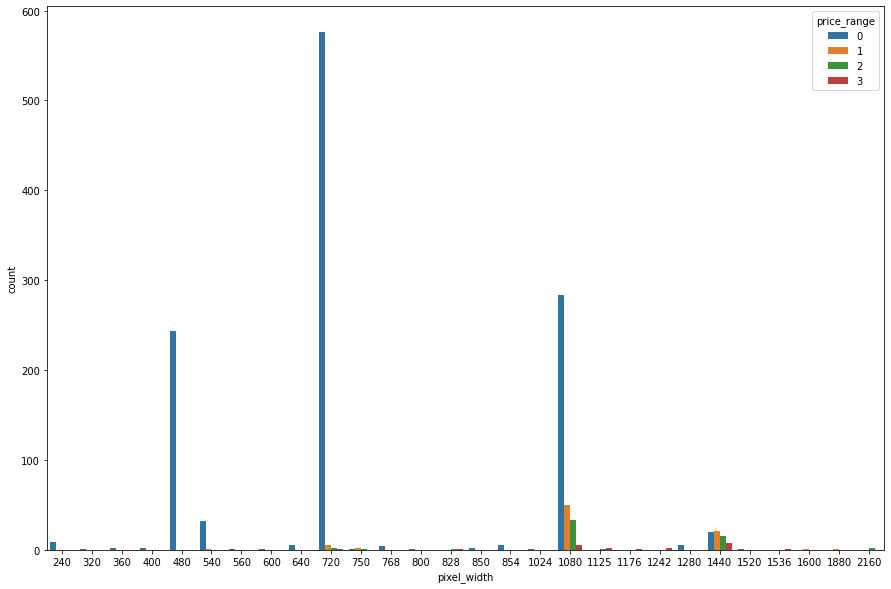

In [73]:
plt.figure(facecolor='w', figsize = (15,10))
sns.countplot(x='pixel_width', data=inr, hue='price_range')

<AxesSubplot:title={'center':'Screen Size Frequency (India 2022)'}, xlabel='screen_size', ylabel='count'>

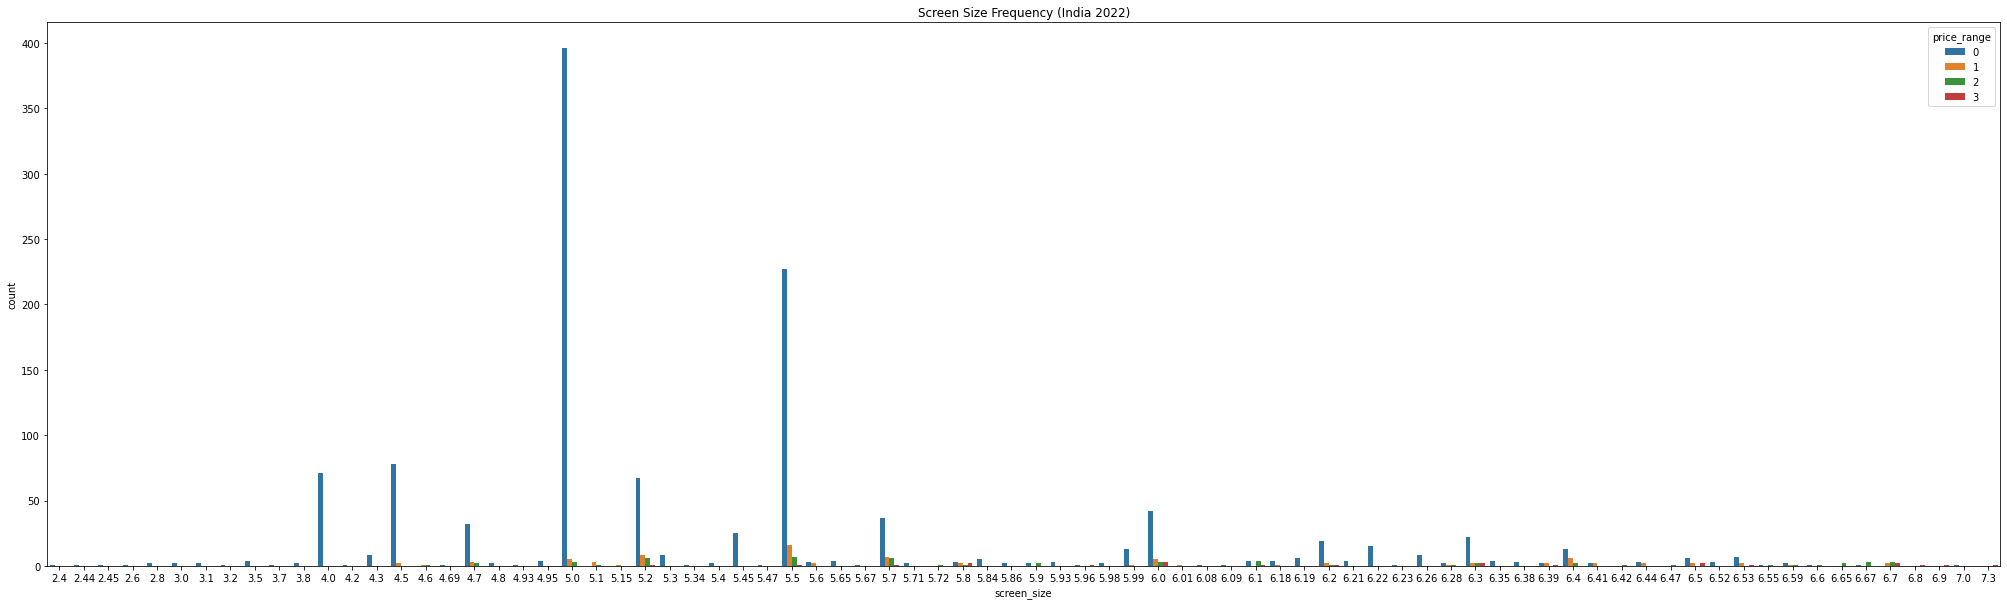

In [119]:
plt.figure(facecolor='w', figsize = (35,10))
plt.title('Screen Size Frequency (India 2022)')
sns.countplot(x='screen_size', data=inr, hue='price_range')

<AxesSubplot:title={'center':'Screen Size - Price Relationship (India 2022)'}, xlabel='screen_size', ylabel='price_range'>

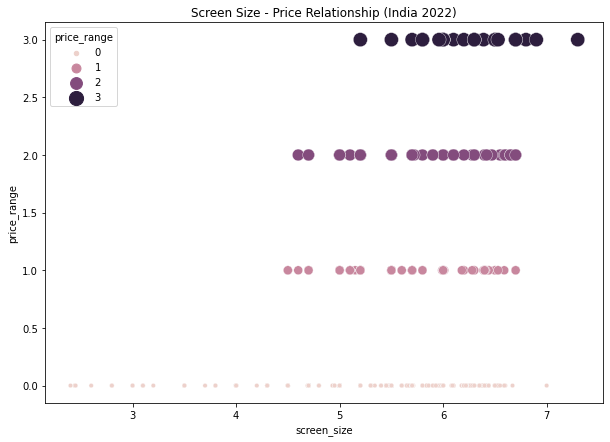

In [113]:
plt.figure(facecolor='w', figsize=(10,7))
plt.title('Screen Size - Price Relationship (India 2022)')
sns.scatterplot(
    data=inr, x="screen_size", y="price_range", hue="price_range", size="price_range",
    sizes=(20, 200), legend="full"
)

<AxesSubplot:title={'center':'Screen Size Frequency for Expensive Phones (India 2022)'}, xlabel='screen_size', ylabel='count'>

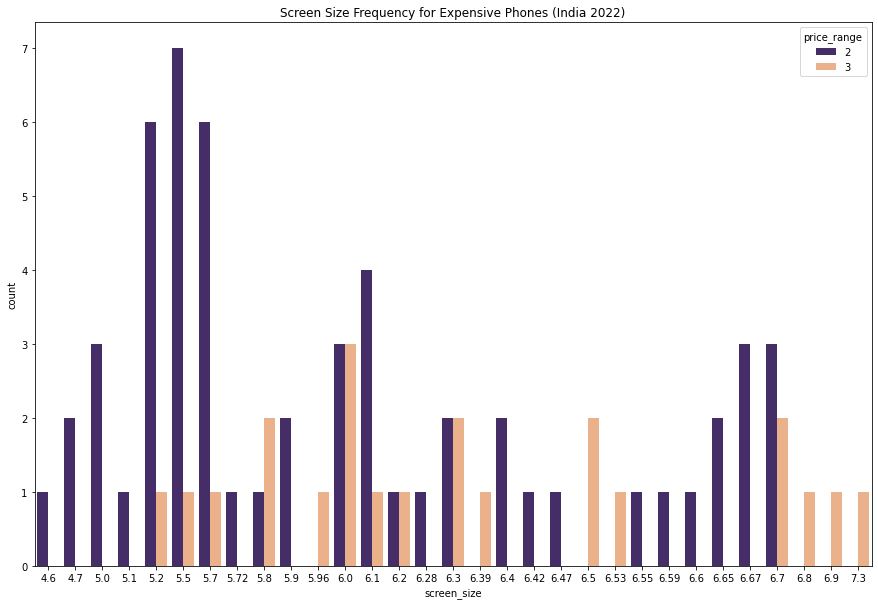

In [156]:
m1 = inr.price_range == 3
m2 = inr.price_range == 2
plt.figure(facecolor='w', figsize = (15,10))
plt.title('Screen Size Frequency for Expensive Phones (India 2022)')
sns.countplot(x='screen_size', data=inr[m1 | m2], hue='price_range', palette=['#432371',"#FAAE7B"])

<AxesSubplot:title={'center':'Screen Size Frequency for Cheap and Mid Phones (India 2022)'}, xlabel='screen_size', ylabel='count'>

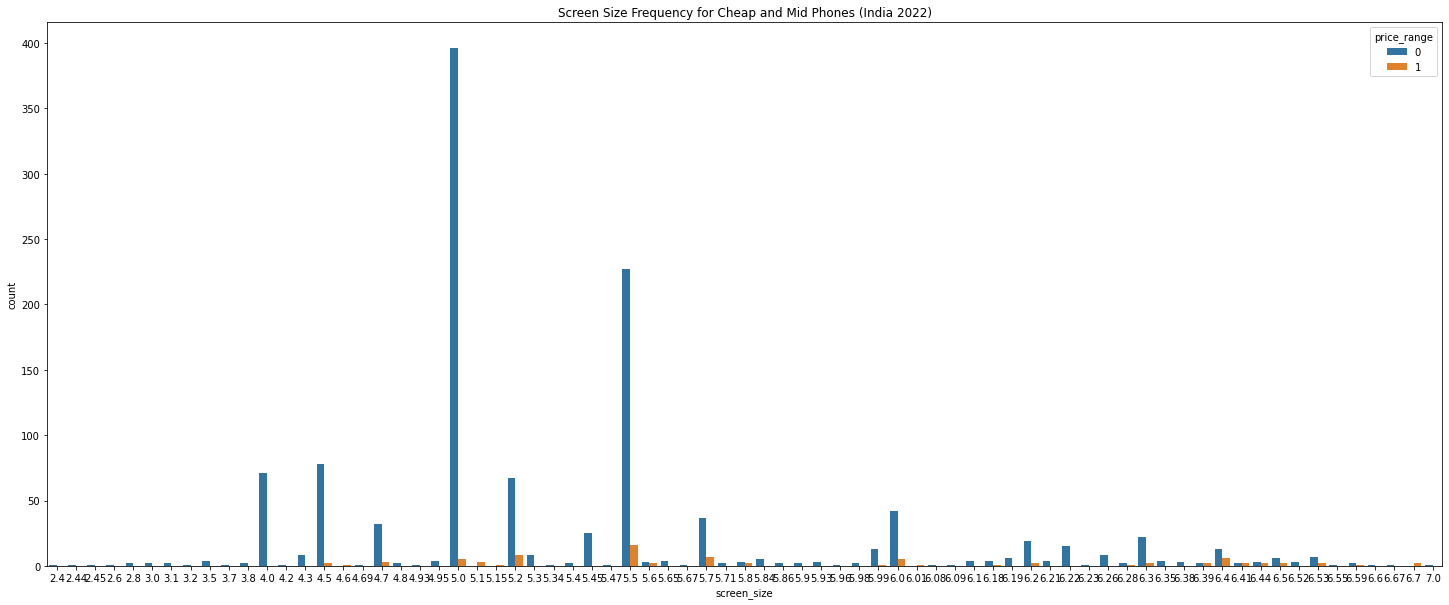

In [164]:
m1 = inr.price_range == 1
m2 = inr.price_range == 0
plt.figure(facecolor='w', figsize = (25,10))
plt.title('Screen Size Frequency for Cheap and Mid Phones (India 2022)')
sns.countplot(x='screen_size', data=inr[m1|m2], hue='price_range')

In [102]:
m1 = inr.pixel_height == 1280
m2 = inr.pixel_height == 1920
m3 = inr.pixel_height == 2340
m4 = inr.pixel_height == 2560
m5 = inr.pixel_width == 480
m6 = inr.pixel_width == 720
m7 = inr.pixel_width == 1080
m8 = inr.pixel_width == 1440
df1 = inr[(m1 | m2 | m3 | m4) & (m5 | m6 | m7 | m8)]
df1

,screen_size,pixel_width,pixel_height,Price,price_range
4,6.40,1080,2340,49990,2
8,6.59,1080,2340,37999,2
9,6.39,1080,2340,23190,1
10,6.50,1080,2340,23990,1
11,6.53,1080,2340,14999,0
...,...,...,...,...,...
1339,5.20,1080,1920,4490,0
1341,6.00,720,1280,5000,0
1345,4.70,720,1280,3990,0
1350,5.00,720,1280,15300,0


In [132]:
df2 = df1.groupby(['pixel_height', 'pixel_width']).apply(count_rows).unstack()
df2.head()

pixel_width,720,1080,1440
pixel_height,,,
1280,431.0,NaN,NaN
1920,NaN,226.0,NaN
2340,NaN,58.0,NaN
2560,NaN,NaN,41.0


Text(0.5, 1.0, 'Heatmap by Pixel Dimensions (India 2022)')

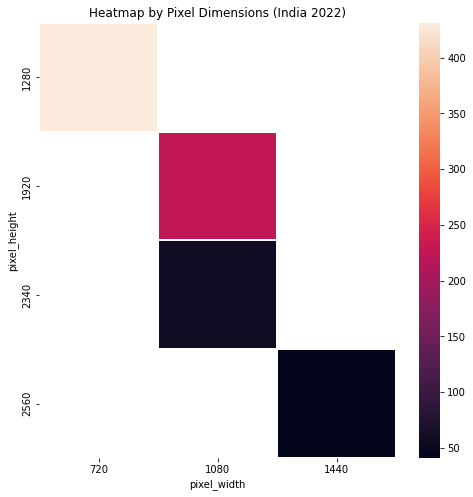

In [135]:
plt.figure(facecolor='w', figsize=(8,8))
heatmap = sns.heatmap(df2, linewidths = 1)
plt.title('Heatmap by Pixel Dimensions (India 2022)',fontsize=12)

In [127]:
df2 = df.groupby(['price_range', 'screen_size']).apply(count_rows).unstack()
df2.head()

screen_size,2.0,2.1,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,...,8.9,9.0,9.1,9.2,9.3,9.5,9.7,9.8,10.0,10.3
price_range,,,,,,,,,,,,,,,,,,,,,
0,8.0,4.0,11.0,13.0,5.0,4.0,11.0,1.0,8.0,11.0,...,2.0,NaN,4.0,3.0,1.0,2.0,1.0,NaN,2.0,4.0
1,16.0,4.0,4.0,12.0,9.0,4.0,11.0,5.0,7.0,5.0,...,4.0,2.0,3.0,10.0,2.0,NaN,NaN,1.0,1.0,2.0
2,7.0,2.0,7.0,18.0,8.0,2.0,22.0,5.0,4.0,6.0,...,1.0,1.0,NaN,6.0,NaN,4.0,4.0,3.0,3.0,NaN
3,12.0,5.0,3.0,6.0,9.0,2.0,13.0,5.0,9.0,9.0,...,4.0,1.0,2.0,6.0,1.0,6.0,4.0,1.0,4.0,2.0


[Text(0, 0.5, 'Low'),
 Text(0, 1.5, 'Mid'),
 Text(0, 2.5, 'High'),
 Text(0, 3.5, 'VeryHigh')]

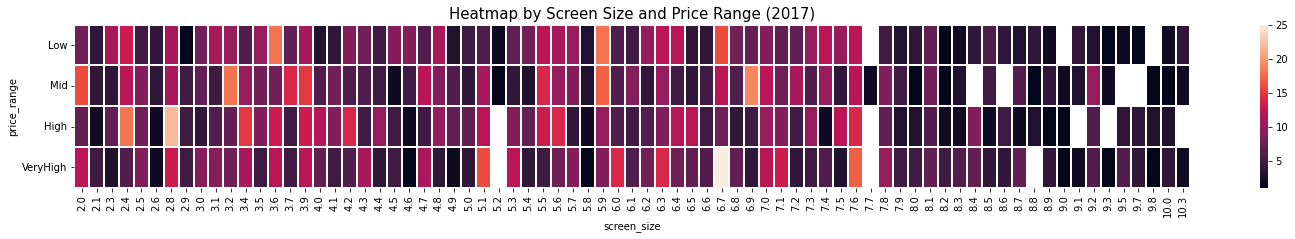

In [128]:
plt.figure(facecolor='w', figsize=(25,3))
heatmap = sns.heatmap(df2, linewidths = 1)
plt.title('Heatmap by Screen Size and Price Range (2017)',fontsize=15)
heatmap.set_yticklabels(('Low Mid High VeryHigh').split(), rotation='horizontal')

<AxesSubplot:title={'center':'Pixel Dimensions (2017)'}, xlabel='pixel_width', ylabel='pixel_height'>

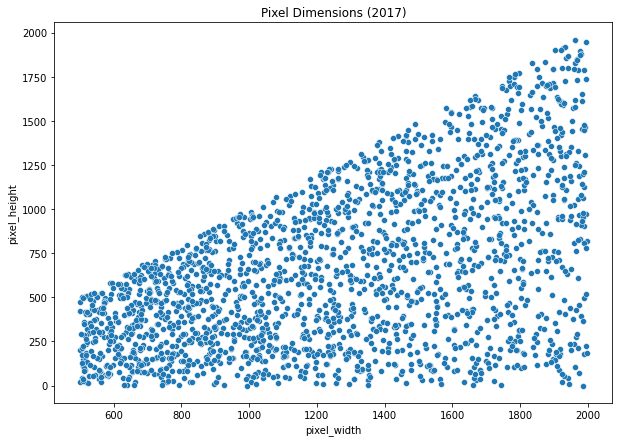

In [136]:
plt.figure(facecolor='w', figsize=(10,7))
plt.title('Pixel Dimensions (2017)')
sns.scatterplot(
    data=df, x="pixel_width", y="pixel_height",
    sizes=(20, 200), legend="full"
)

<AxesSubplot:title={'center':'Pixel Dimensions (India 2022)'}, xlabel='pixel_width', ylabel='pixel_height'>

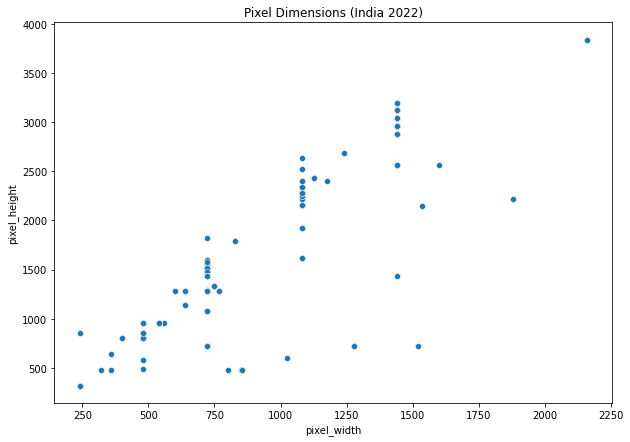

In [137]:
plt.figure(facecolor='w', figsize=(10,7))
plt.title('Pixel Dimensions (India 2022)')
sns.scatterplot(
    data=inr, x="pixel_width", y="pixel_height",
    sizes=(20, 200), legend="full"
)

In [139]:
df2

pixel_width,720,1080,1440
pixel_height,,,
1280,431.0,NaN,NaN
1920,NaN,226.0,NaN
2340,NaN,58.0,NaN
2560,NaN,NaN,41.0


<AxesSubplot:title={'center':'Pixel Height Frequency for Expensive Phones (India 2022)'}, xlabel='pixel_height', ylabel='count'>

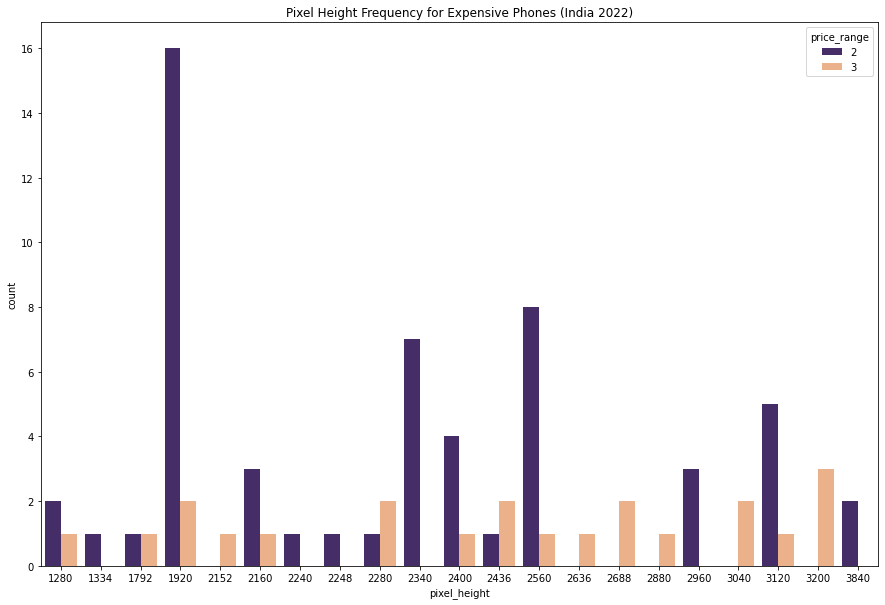

In [146]:
m1 = inr.price_range == 3
m2 = inr.price_range == 2
plt.figure(facecolor='w', figsize = (15,10))
plt.title('Pixel Height Frequency for Expensive Phones (India 2022)')
sns.countplot(x='pixel_height', data=inr[m1 | m2], hue='price_range', palette=['#432371',"#FAAE7B"])

<AxesSubplot:title={'center':'Pixel Height Frequency for Cheap and Mid Phones (India 2022)'}, xlabel='pixel_height', ylabel='count'>

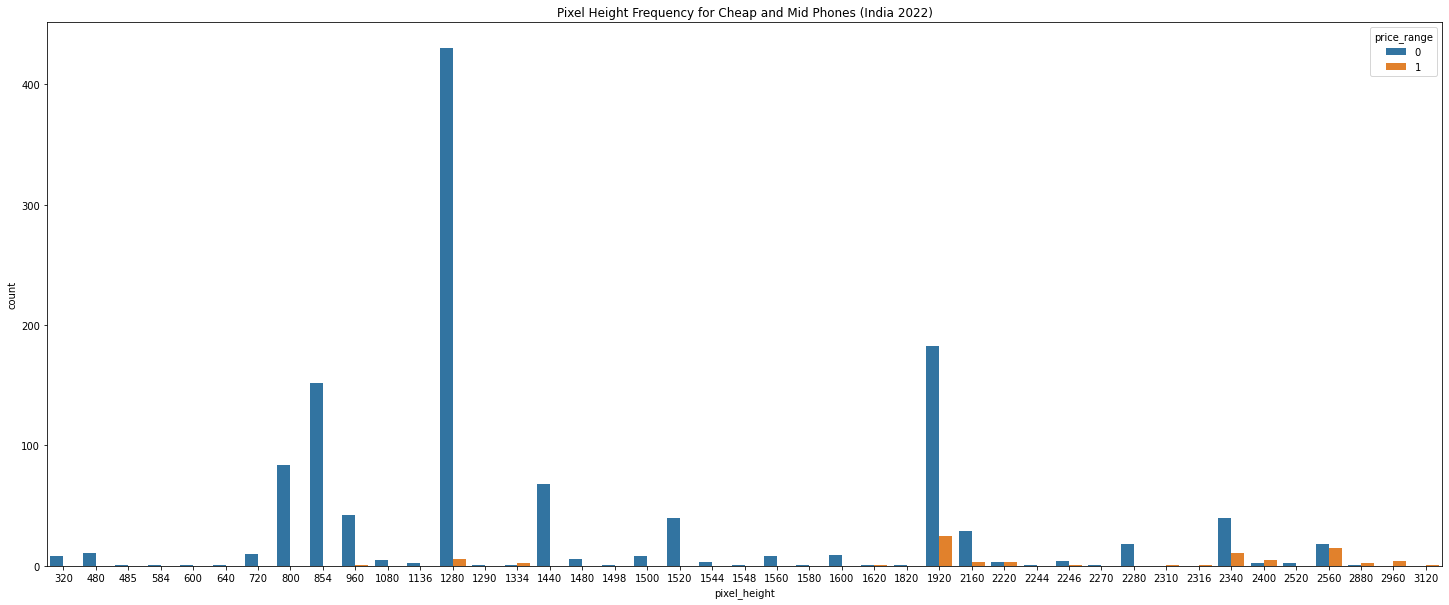

In [147]:
m1 = inr.price_range == 1
m2 = inr.price_range == 0
plt.figure(facecolor='w', figsize = (25,10))
plt.title('Pixel Height Frequency for Cheap and Mid Phones (India 2022)')
sns.countplot(x='pixel_height', data=inr[m1 | m2], hue='price_range')

<AxesSubplot:title={'center':'Pixel Width Frequency for Cheap and Mid Phones (India 2022)'}, xlabel='pixel_width', ylabel='count'>

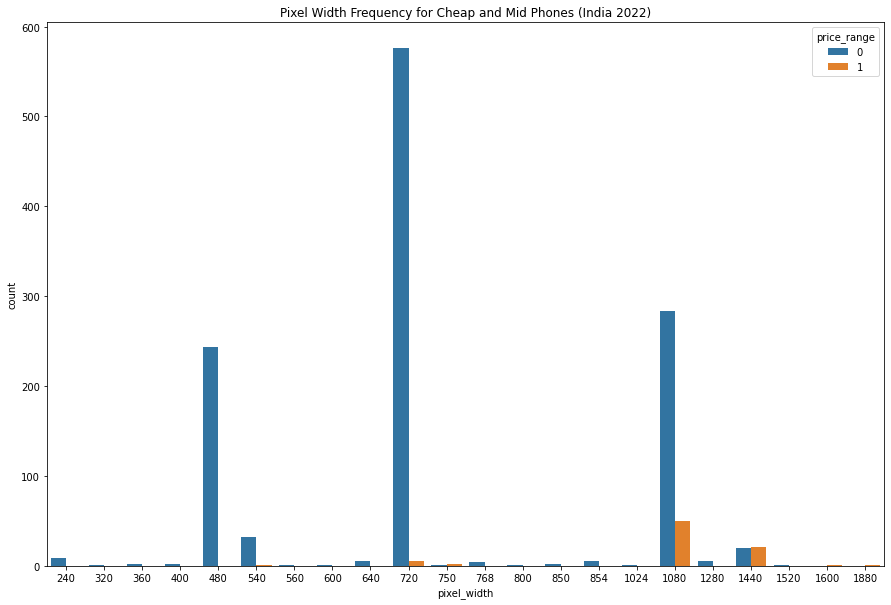

In [151]:
m1 = inr.price_range == 1
m2 = inr.price_range == 0
plt.figure(facecolor='w', figsize = (15,10))
plt.title('Pixel Width Frequency for Cheap and Mid Phones (India 2022)')
sns.countplot(x='pixel_width', data=inr[m1 | m2], hue='price_range')

<AxesSubplot:title={'center':'Pixel Width Frequency for Expensive Phones (India 2022)'}, xlabel='pixel_width', ylabel='count'>

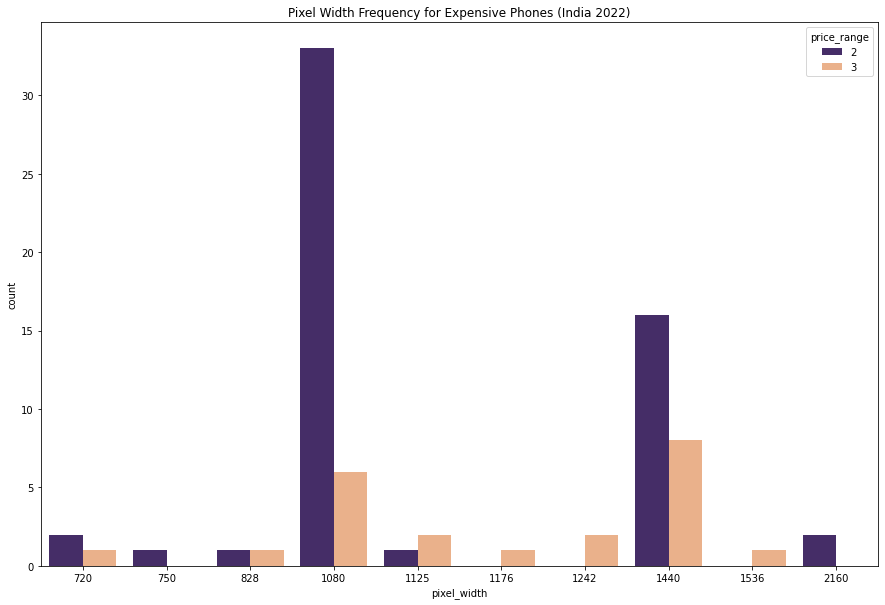

In [150]:
m1 = inr.price_range == 2
m2 = inr.price_range == 3
plt.figure(facecolor='w', figsize = (15,10))
plt.title('Pixel Width Frequency for Expensive Phones (India 2022)')
sns.countplot(x='pixel_width', data=inr[m1 | m2], hue='price_range',palette=['#432371',"#FAAE7B"])

KeyError: "['pixel width'] not in index"

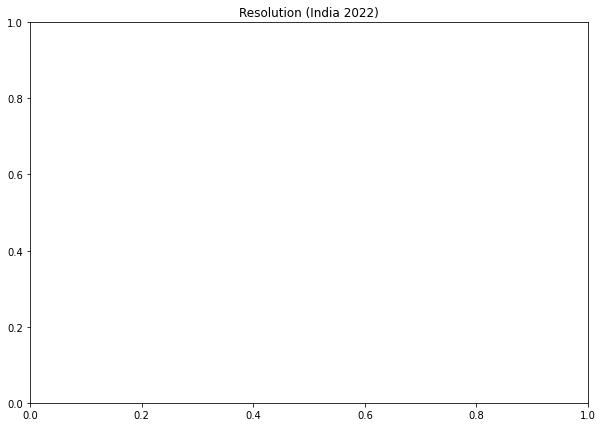